Steps you will go through:
 - Look at he big picture
 - Get the data
 - Discover and visialize the data
 - Prepare the data
 - Select ML model and training
 - fine-tune your model
 - Present your solution
 - launch your system

### Pipelines 

A sequence of data processing componenets is called a data pipelines. Pipelines are very common in ML systems. since there is a lot of data to manipulate and many data transformations to apply.

First you need to frame the problem: is it supervised, unsupervised or reinforcement learning. Is it a classification task , a regression task, or something else. should you use batch learning or online learning in techniques. 

If data huce you select batch learning else you select online learning.

### Select a Performance measure

System prediction function also called a hyphotesis

RMSE is generally the preferred performance measure for regression task

RMSE  and the MAE are ways to measure the distance between two vectors. the vector of predictions and the vecor of target values.

RMSE is more sensitive than MAE.


In [11]:
import os 
import tarfile 
from six.moves import urllib

DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml/"
HOUSING_PATH = "datasets/housing"
HOUSING_URL = DOWNLOAD_ROOT + HOUSING_PATH + "/housing.tgz"
def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
    if not os.path.isdir(housing_path):
       os.makedirs(housing_path)
    tgz_path = os.path.join(housing_path, "housing.tgz")
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()
    
    
    

In [8]:
import pandas as pd
def load_housing_data(housing_path=HOUSING_PATH):
    csv_path = os.path.join(housing_path, "housing.csv")
    return pd.read_csv(csv_path)

In [12]:
housing = pd.read_csv('housing.csv')

In [13]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [14]:
housing.info

<bound method DataFrame.info of        longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0        -122.23     37.88                41.0        880.0           129.0   
1        -122.22     37.86                21.0       7099.0          1106.0   
2        -122.24     37.85                52.0       1467.0           190.0   
3        -122.25     37.85                52.0       1274.0           235.0   
4        -122.25     37.85                52.0       1627.0           280.0   
...          ...       ...                 ...          ...             ...   
20635    -121.09     39.48                25.0       1665.0           374.0   
20636    -121.21     39.49                18.0        697.0           150.0   
20637    -121.22     39.43                17.0       2254.0           485.0   
20638    -121.32     39.43                18.0       1860.0           409.0   
20639    -121.24     39.37                16.0       2785.0           616.0   

       population  

In [15]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


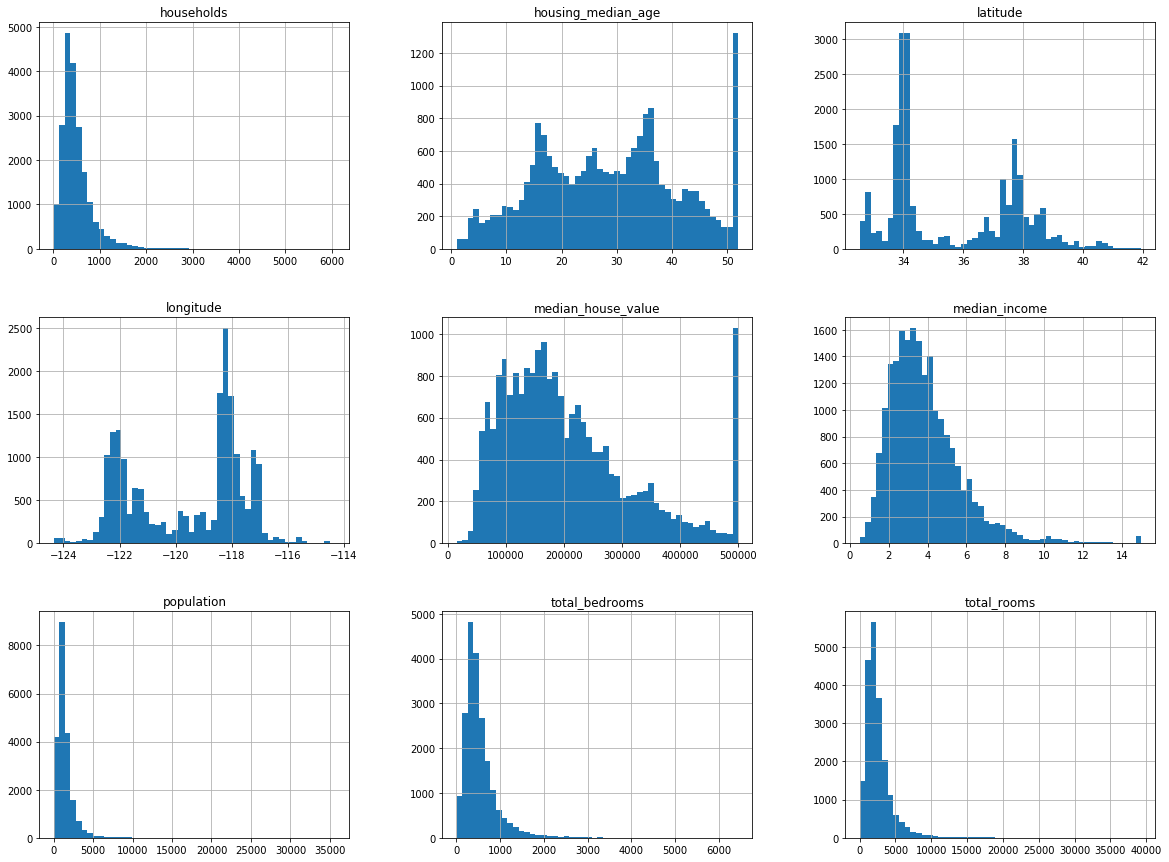

In [16]:
import matplotlib.pyplot as plt 

housing.hist( bins = 50, figsize = (20,15) )
plt.show()

### Create test set

 When you estimate the generalization error using the test
set, your estimate will be too optimistic and you will launch a system that will not
perform as well as expected. This is called data snooping bias.

Creating a test set is theoretically quite simple: just pick some instances randomly,
typically 20% of the dataset, and set them aside:

In [23]:
import numpy as np 

def split_train_test( data, test_ratio):
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio )
    test_indices = shuffled_indices[test_set_size:]
    train_indices = shuffled_indices[:test_set_size]
    
    return data.iloc[train_indices], data.iloc[test_indices]

In [25]:
train_set, test_set = split_train_test(housing, 0.2)

print("train set size: {} \n test set size: {}".format(len(train_set), len(test_set)))

train set size: 4128 
 test set size: 16512


Well, this works, but it is not perfect: if you run the program again, it will generate a
different test set! Over time, you (or your Machine Learning algorithms) will get to
see the whole dataset, which is what you want to avoid.

One solution is to save the test set on the first run and then load it in subsequent
runs. Another option is to set the random number generator’s seed (e.g., np.ran
dom.seed(42))
13 before calling np.random.permutation(), so that it always generates
the same shuffled indices.

 A common solution is to use each instance’s identifier to decide whether or not it should go
in the test set (assuming instances have a unique and immutable identifier). 

In [26]:
import hashlib
def test_set_check(identifier, test_ratio, hash):
    return hash(np.int64(identifier)).digest()[-1] < 256 * test_ratio
def split_train_test_by_id(data, test_ratio, id_column, hash=hashlib.md5):
    ids = data[id_column]
    in_test_set = ids.apply(lambda id_: test_set_check(id_, test_ratio, hash))
    return data.loc[~in_test_set], data.loc[in_test_set]


In [27]:
housing_with_id = housing.reset_index() 
train_set, test_set = split_train_test_by_id(housing_with_id, 0.2, "index")

In [28]:
housing_with_id["id"] = housing["longitude"] * 1000 + housing["latitude"]
train_set, test_set = split_train_test_by_id(housing_with_id, 0.2, "id")


In [29]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

 For example, the US population is composed of 51.3% female and 48.7% male, so a well-conducted survey in the US would try to maintain this ratio in the sample: 513 female and 487 male. This is called stratified sampling: the population is divided into homogeneous subgroups called strata,
and the right number of instances is sampled from each stratum to guarantee that the
test set is representative of the overall population. 

In [30]:
housing["income_cat"] = np.ceil(housing["median_income"] / 1.5)
housing["income_cat"].where(housing["income_cat"] < 5, 5.0, inplace=True)


In [31]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing, housing["income_cat"]):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

In [32]:
 housing["income_cat"].value_counts() / len(housing)

3.0    0.350581
2.0    0.318847
4.0    0.176308
5.0    0.114438
1.0    0.039826
Name: income_cat, dtype: float64

In [33]:
for set in (strat_train_set, strat_test_set):
    set.drop(["income_cat"], axis=1, inplace=True)


### Visualizing Geographical Data


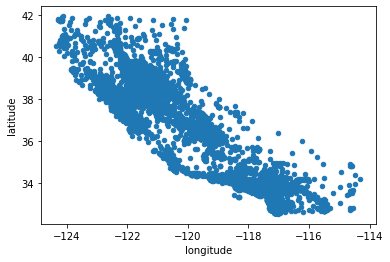

In [34]:
housing.plot(kind="scatter", x="longitude", y="latitude")


Setting the alpha option to 0.1 makes it much easier to visualize the places
where there is a high density of data points

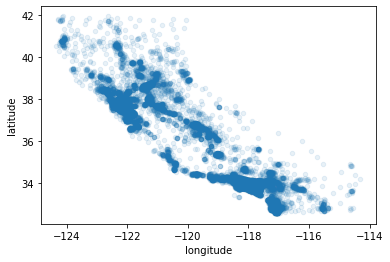

In [35]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.1)


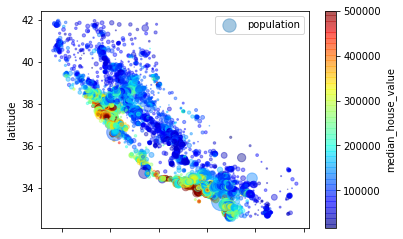

In [36]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
 s=housing["population"]/100, label="population",
 c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True,
)
plt.legend()

### Looking for Correlations


Since the dataset is not too large, you can easily compute the standard correlation
coecient (also called Pearson’s r) between every pair of attributes using the corr()
method

In [37]:
corr_matrix = housing.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688075
income_cat            0.643892
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64

The correlation coefficient ranges from –1 to 1. When it is close to 1, it means that
there is a strong positive correlation; for example, the median house value tends to go
up when the median income goes up. When the coefficient is close to –1, it means
that there is a strong negative correlation; you can see a small negative correlation
between the latitude and the median house value

Above function correlation for median_house_value coef.

The correlation coefficient only measures linear correlations (“if x
goes up, then y generally goes up/down”)

Another way to check for correlation between attributes is to use Pandas’
scatter_matrix function, which plots every numerical attribute against every other
numerical attribute.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001C36BDA0688>,
      dtype=object)

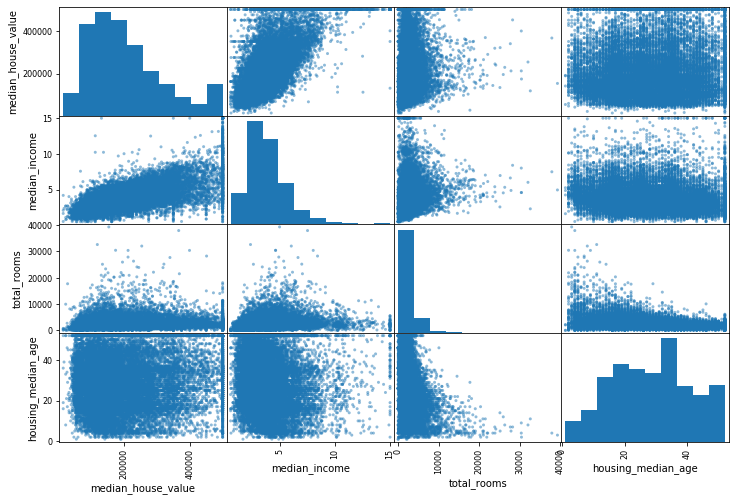

In [41]:
from pandas.plotting import scatter_matrix
attributes = ["median_house_value", "median_income", "total_rooms",
 "housing_median_age"]
scatter_matrix(housing[attributes], figsize=(12, 8))

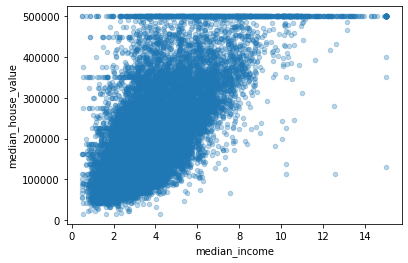

In [40]:
housing.plot(kind="scatter", x="median_income", y="median_house_value",
 alpha=0.3)

## Prepare the Data for Machine Learning Algorithms


### Data Cleaning


• Get rid of the corresponding districts.

• Get rid of the whole attribute.

• Set the values to some value (zero, the mean, the median, etc.).

You can accomplish these easily using DataFrame’s dropna(), drop(), and fillna()
method

In [43]:

housing.dropna(subset=["total_bedrooms"]) # option 1
housing.drop("total_bedrooms", axis=1) # option 2
median = housing["total_bedrooms"].median()
housing["total_bedrooms"].fillna(median) # option 3

0         129.0
1        1106.0
2         190.0
3         235.0
4         280.0
          ...  
20635     374.0
20636     150.0
20637     485.0
20638     409.0
20639     616.0
Name: total_bedrooms, Length: 20640, dtype: float64

don’t forget to save the
median value that you have computed. You will need it later to replace missing values
in the test set when you want to evaluate your system, and also once the system goes
live to replace missing values in new data.

Scikit-Learn provides a handy class to take care of missing values: Imputer. Here is
how to use it. First, you need to create an Imputer instance, specifying that you want
to replace each attribute’s missing values with the median of that attribute:

In [45]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="median")
housing_num = housing.drop("ocean_proximity", axis=1)

imputer.fit(housing_num)

imputer.statistics_
housing_num.median().values

array([-1.1849e+02,  3.4260e+01,  2.9000e+01,  2.1270e+03,  4.3500e+02,
        1.1660e+03,  4.0900e+02,  3.5348e+00,  1.7970e+05,  3.0000e+00])

Now you can use this “trained” imputer to transform the training set by replacing
missing values by the learned medians:

In [46]:
X = imputer.transform(housing_num)
housing_tr = pd.DataFrame(X, columns=housing_num.columns)


### Handling Text and Categorical Attributes


Most Machine Learning algorithms pre‐
fer to work with numbers anyway, so let’s convert these text labels to numbers.
Scikit-Learn provides a transformer for this task called LabelEncoder:


In [47]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
housing_cat = housing["ocean_proximity"]
housing_cat_encoded = encoder.fit_transform(housing_cat)
housing_cat_encoded


array([3, 3, 3, ..., 1, 1, 1])

In [48]:
 print(encoder.classes_)

['<1H OCEAN' 'INLAND' 'ISLAND' 'NEAR BAY' 'NEAR OCEAN']


One issue with this representation is that ML algorithms will assume that two nearby
values are more similar than two distant values. Obviously this is not the case (for
example, categories 0 and 4 are more similar than categories 0 and 1). To fix this
issue, a common solution is to create one binary attribute per category: one attribute
equal to 1 when the category is “<1H OCEAN” (and 0 otherwise), another attribute
equal to 1 when the category is “INLAND” (and 0 otherwise), and so on. This is
called one-hot encoding, because only one attribute will be equal to 1 (hot), while the
others will be 0 (cold).

Scikit-Learn provides a OneHotEncoder encoder to convert integer categorical values
into one-hot vectors. 

In [49]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder()
housing_cat_1hot = encoder.fit_transform(housing_cat_encoded.reshape(-1,1))
housing_cat_1hot

<20640x5 sparse matrix of type '<class 'numpy.float64'>'
	with 20640 stored elements in Compressed Sparse Row format>

In [50]:
    housing_cat_1hot.toarray()


array([[0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       ...,
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.]])

We can apply both transformations (from text categories to integer categories, then
from integer categories to one-hot vectors) in one shot using the LabelBinarizer
class:

In [51]:
from sklearn.preprocessing import LabelBinarizer
encoder = LabelBinarizer()
housing_cat_1hot = encoder.fit_transform(housing_cat)
housing_cat_1hot

array([[0, 0, 0, 1, 0],
       [0, 0, 0, 1, 0],
       [0, 0, 0, 1, 0],
       ...,
       [0, 1, 0, 0, 0],
       [0, 1, 0, 0, 0],
       [0, 1, 0, 0, 0]])

Note that this returns a dense NumPy array by default. You can get a sparse matrix
instead by passing sparse_output=True to the LabelBinarizer constructor

### Custom Transformers


In [52]:
from sklearn.base import BaseEstimator, TransformerMixin
rooms_ix, bedrooms_ix, population_ix, household_ix = 3, 4, 5, 6
class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room = True): # no *args or **kargs
        self.add_bedrooms_per_room = add_bedrooms_per_room
    def fit(self, X, y=None):
        return self # nothing else to do
    def transform(self, X, y=None):
        rooms_per_household = X[:, rooms_ix] / X[:, household_ix]
        population_per_household = X[:, population_ix] / X[:, household_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household,
 bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]
        
attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
housing_extra_attribs = attr_adder.transform(housing.values)

### Feature Scaling


One of the most important transformations you need to apply to your data is feature
scaling. With few exceptions, Machine Learning algorithms don’t perform well when
the input numerical attributes have very different scales

There are two common ways to get all attributes to have the same scale: min-max
scaling and standardization.

Min-max scaling (many people call this normalization) is quite simple: values are
shifted and rescaled so that they end up ranging from 0 to 1. We do this by subtract‐
ing the min value and dividing by the max minus the min. Scikit-Learn provides a
transformer called MinMaxScaler for this.

neural networks often expect an input value ranging from 0 to 1). However, standard‐
ization is much less affected by outliers. For example, suppose a district had a median
income equal to 100 (by mistake).

### Transformation Pipelines


Fortunately, Scikit-Learn provides the Pipeline class to help with
such sequences of transformations. Here is a small pipeline for the numerical
attributes:

In [55]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
num_pipeline = Pipeline([
 ('imputer', SimpleImputer(strategy="median")),
 ('attribs_adder', CombinedAttributesAdder()),
 ('std_scaler', StandardScaler()),
 ])
housing_num_tr = num_pipeline.fit_transform(housing_num)
housing_num_tr


array([[-1.32783522,  1.05254828,  0.98214266, ...,  0.62855945,
        -0.04959654, -1.02998783],
       [-1.32284391,  1.04318455, -0.60701891, ...,  0.32704136,
        -0.09251223, -0.8888972 ],
       [-1.33282653,  1.03850269,  1.85618152, ...,  1.15562047,
        -0.02584253, -1.29168566],
       ...,
       [-0.8237132 ,  1.77823747, -0.92485123, ..., -0.09031802,
        -0.0717345 ,  0.02113407],
       [-0.87362627,  1.77823747, -0.84539315, ..., -0.04021111,
        -0.09122515,  0.09346655],
       [-0.83369581,  1.75014627, -1.00430931, ..., -0.07044252,
        -0.04368215,  0.11327519]])

The Pipeline constructor takes a list of name/estimator pairs defining a sequence of
steps.

In [66]:
from sklearn.base import BaseEstimator, TransformerMixin
class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X[self.attribute_names].values

### Select and Train a Model


In [ ]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, housing_labels)

some_data = housing.iloc[:5]
some_labels = housing_labels.iloc[:5]
some_data_prepared = full_pipeline.transform(some_data)
print("Predictions:\t", lin_reg.predict(some_data_prepared))

In [ ]:
from sklearn.metrics import mean_squared_error
housing_predictions = lin_reg.predict(housing_prepared)
lin_mse = mean_squared_error(housing_labels, housing_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

Let’s train a DecisionTreeRegressor. This is a powerful model, capable of finding
complex nonlinear relationships in the data (

In [ ]:
from sklearn.tree import DecisionTreeRegressor
tree_reg = DecisionTreeRegressor()
tree_reg.fit(housing_prepared, housing_labels)

In [ ]:
housing_predictions = tree_reg.predict(housing_prepared)
tree_mse = mean_squared_error(housing_labels, housing_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse


you don’t want to touch the test set until you are ready to launch a
model you are confident about, so you need to use part of the training set for train‐
ing, and part for model validation.

### Better Evaluation Using Cross-Validation


One way to evaluate the Decision Tree model would be to use the train_test_split
function to split the training set into a smaller training set and a validation set, then
train your models against the smaller training set and evaluate them against the vali‐
dation set. It’s a bit of work, but nothing too difficult and it would work fairly well.


A great alternative is to use Scikit-Learn’s cross-validation feature. The following code
performs K-fold cross-validation: it randomly splits the training set into 10 distinct
subsets called folds

In [ ]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(tree_reg, housing_prepared, housing_labels,
 scoring="neg_mean_squared_error", cv=10)
rmse_scores = np.sqrt(-scores)


In [ ]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())
    
display_scores(tree_rmse_scores)

 The Decision Tree has a
score of approximately 71,200, generally ±3,200. You would not have this information
if you just used one validation set. But cross-validation comes at the cost of training
the model several times, so it is not always possible

In [ ]:
 lin_scores = cross_val_score(lin_reg, housing_prepared, housing_labels,
                                scoring="neg_mean_squared_error", cv=10)
    
lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)


That’s right: the Decision Tree model is overfitting so badly that it performs worse
than the Linear Regression model.

 Building a model on top of many
other models is called Ensemble Learning, and it is often a great way to push ML algo‐
rithms even further.

In [ ]:
from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor()
forest_reg.fit(housing_prepared, housing_labels)
forest_rmse

display_scores(forest_rmse_scores)

Wow, this is much better: Random Forests look very promising. However, note that
the score on the training set is still much lower than on the validation sets, meaning
that the model is still overfitting the training set. Possible solutions for overfitting are
to simplify the model, constrain it (i.e., regularize it), or get a lot more training data

You should save every model you experiment with, so you can
come back easily to any model you want. Make sure you save both
the hyperparameters and the trained parameters, as well as the
cross-validation scores and perhaps the actual predictions as well.

In [ ]:
from sklearn.externals import joblib
joblib.dump(my_model, "my_model.pkl")
my_model_loaded = joblib.load("my_model.pkl")

## Fine-Tune Your Model


### Grid Search
 

One way to do that would be to fiddle with the hyperparameters manually, until you
find a great combination of hyperparameter values.
Instead you should get Scikit-Learn’s GridSearchCV to search for you.

In [ ]:
from sklearn.model_selection import GridSearchCV
param_grid = [
 {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
 {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
 ]
forest_reg = RandomForestRegressor()
grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
 scoring='neg_mean_squared_error')
grid_search.fit(housing_prepared, housing_labels)

This param_grid tells Scikit-Learn to first evaluate all 3 × 4 = 12 combinations of
n_estimators and max_features hyperparameter values specified in the first dict

 then try all 2 × 3 = 6 combinations of hyperparameter values in the
second dict,

All in all, the grid search will explore 12 + 6 = 18 combinations of RandomForestRe
gressor hyperparameter values, and it will train each model five times (since we are
using five-fold cross validation).

In [ ]:
grid_search.best_params_

grid_search.best_estimator_


cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

### Randomized Search


 This class can be used in much
the same way as the GridSearchCV class, but instead of trying out all possible combi‐
nations, it evaluates a given number of random combinations by selecting a random
value for each hyperparameter at every iteration. This approach has two main bene‐
fits:

• If you let the randomized search run for, say, 1,000 iterations, this approach will
explore 1,000 different values for each hyperparameter (instead of just a few val‐
ues per hyperparameter with the grid search approach).

• You have more control over the computing budget you want to allocate to hyper‐
parameter search, simply by setting the number of iterations.

## Ensemble Methods


### Ensemble Methods


In [ ]:
feature_importances = grid_search.best_estimator_.feature_importances_
feature_importances

In [ ]:
extra_attribs = ["rooms_per_hhold", "pop_per_hhold", "bedrooms_per_room"]
cat_one_hot_attribs = list(encoder.classes_)
attributes = num_attribs + extra_attribs + cat_one_hot_attribs
sorted(zip(feature_importances, attributes), reverse=True)

apparently only one ocean_proximity category is really useful, so you could try
dropping the others).

You should also look at the specific errors that your system makes, then try to under‐
stand why it makes them and what could fix the problem (adding extra features or, on
the contrary, getting rid of uninformative ones, cleaning up outliers, etc.).


### Evaluate Your System on the Test Set


 get the predictors and the labels from your
test set, run your full_pipeline to transform the data (call transform(), not
fit_transform()!), and evaluate the final model on the test set:

In [ ]:
final_model = grid_search.best_estimator_
X_test = strat_test_set.drop("median_house_value", axis=1)
y_test = strat_test_set["median_house_value"].copy()
X_test_prepared = full_pipeline.transform(X_test)
final_predictions = final_model.predict(X_test_prepared)
final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse) 